In [364]:
#choose dataset +
#choose purpose of analysis  
#create v/env + 
#import libraries
#import dataset

In [365]:
#import libraries
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [366]:
#connect to DB to import data from table
# con = sqlite3.connect("titanic.db")
# cur = con.cursor()
# tit_df = pd.read_sql('''
#     SELECT PassengerId,Survived,PClass,Name,Sex,Age,Fare,Embarked            
#     FROM titan_person''', con)
# tit_df.head()

In [367]:
titanic_df = pd.read_csv(r'C:\Users\Alex\data_analysis\full_cycle_project\titanic_full_cycle_project\Titanic.csv')
titanic_df.tail()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
886,male,27.0,0,0,13.00,S,Second,man,True,0
887,female,19.0,0,0,30.00,S,First,woman,True,1
888,female,NaN,1,2,23.45,S,Third,woman,False,0
889,male,26.0,0,0,30.00,C,First,man,True,1
890,male,32.0,0,0,7.75,Q,Third,man,True,0


In [384]:
#delete repeat column (name of columns)
# tit_df.drop(index=0,axis = 1, inplace = True)

In [385]:
titanic_df.columns

Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who',
       'alone', 'survived'],
      dtype='object')

In [370]:
#correct indecies
# tit_df = tit_df.reset_index()
# tit_df.head()


In [371]:
# tit_df.drop('index', axis = 1, inplace = True)
# tit_df.head()

In [372]:
# change type of el's in columns Age,Fare
# change (age,fare) el's from '' to NaN 
# tit_df['Age'] = tit_df['Age'].replace('',np.nan)
# tit_df['Fare'] = tit_df['Fare'].replace('',np.nan)

In [373]:
#change type of columns
# tit_df.info()
# print('===================================================')
# convert_dict = {'PassengerId': int,
#                 'Survived': int,
#                 'PClass': int,
#                 'Age':float,
#                 'Fare':float
#                 }
# tit_df = tit_df.astype(convert_dict)
# print(tit_df.dtypes)

In [374]:
# replace NaN to age.mean / and drop Fare el's
# mean_age = round(tit_df[tit_df['Age'] != '']['Age'].mean())
# tit_df['Age'] = tit_df['Age'].fillna(mean_age)
# tit_df= tit_df.dropna()

In [375]:
# tit_df.to_csv('EDA_tit.csv')

In [376]:
# path = r'EDA_tit.csv'
# titanic_df = pd.read_csv(path)
# titanic_df = titanic_df.drop('Unnamed: 0',axis=1)
# titanic_df.head()

In [377]:
# titanic_df.shape

In [378]:
titanic_df.describe()

,age,sibsp,parch,fare,survived
count,714.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208,0.383838
std,14.526497,1.102743,0.806057,49.693429,0.486592
min,0.420000,0.000000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400,0.000000
50%,28.000000,0.000000,0.000000,14.454200,0.000000
75%,38.000000,1.000000,0.000000,31.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000


In [379]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB


In [380]:
#qestions for vizualization
# -- how many pass of each class was on the ship
# -- what is max/min/av age of pass
# -- what is max/min/av age of pass for each class
# -- how many male/female wa on ship
# -- how many male/female of each class was on the ship
# -- what percent of surv from male / female
# -- what precent of surv from each class
# -- how many pass of each emb place was on the ship

In [381]:
# -- how many pass of each class was on the ship

# -- how many pass of each class was on the ship

In [ ]:
titanic_df['PClass'].value_counts().sort_index()

PClass
1    107
2     93
3    217
Name: count, dtype: int64

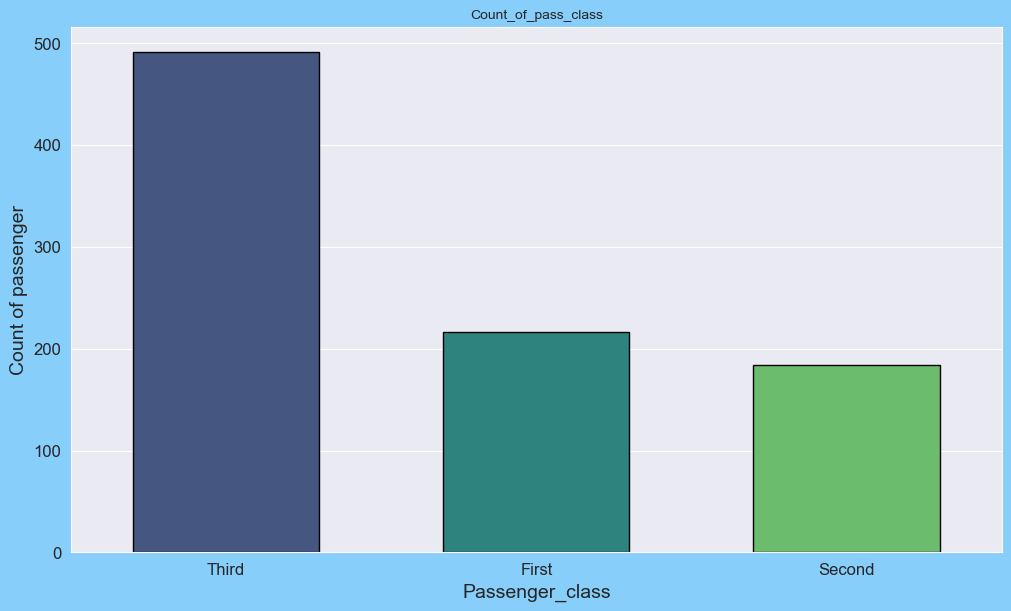

In [388]:
fig, ax = plt.subplots(figsize=(10, 6), facecolor='lightskyblue',layout='constrained')
ax = sns.countplot(titanic_df,x='class',palette = 'viridis',width=0.6,edgecolor = 'black')
#style of diagram
sns.set_style("darkgrid")
ax.set_title('Count_of_pass_class', loc='center', fontsize='medium')
plt.xticks(size=12)
plt.xlabel('Passenger_class', size=14)
plt.yticks(size=12)
plt.ylabel('Count of passenger', size=14)
plt.show()


# -- what is max/min/av age of pass

In [ ]:
titanic_df['Age'].min()

0.17

In [ ]:
titanic_df['Age'].max()

76.0

In [ ]:
titanic_df['Age'].mean()

30.272590361445783

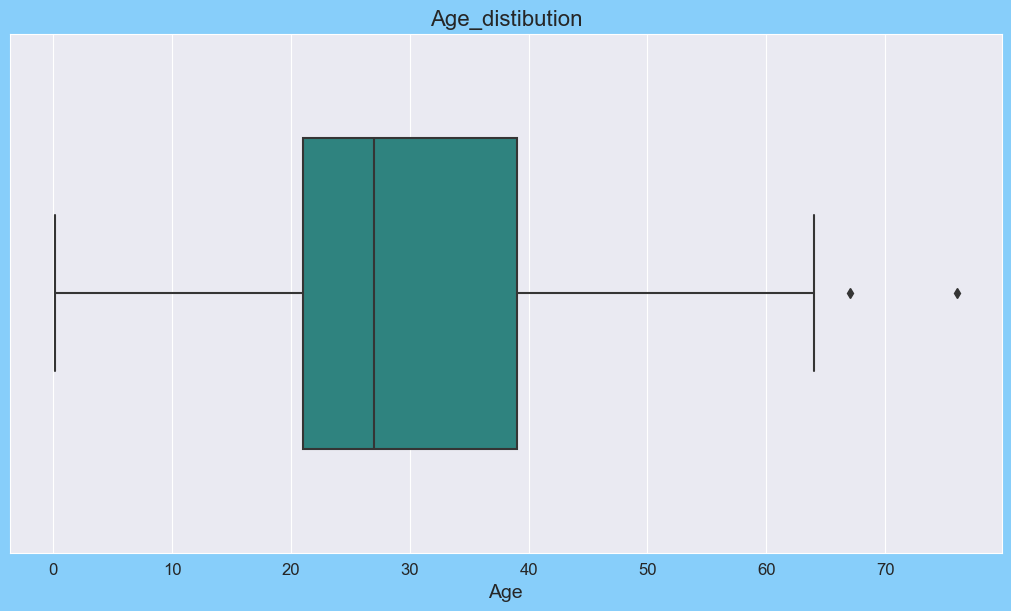

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6), facecolor='lightskyblue',layout='constrained')
ax = sns.boxplot(titanic_df,x='Age',palette = 'viridis',width=0.6)
#style of diagram
sns.set_style("darkgrid")
ax.set_title('Age_distibution', loc='center', fontsize='medium',size = 16)
plt.xticks(size=12)
plt.xlabel('Age', size=14)
plt.yticks(size=12)
plt.show()

a:\anaconda3\envs\electro_car\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


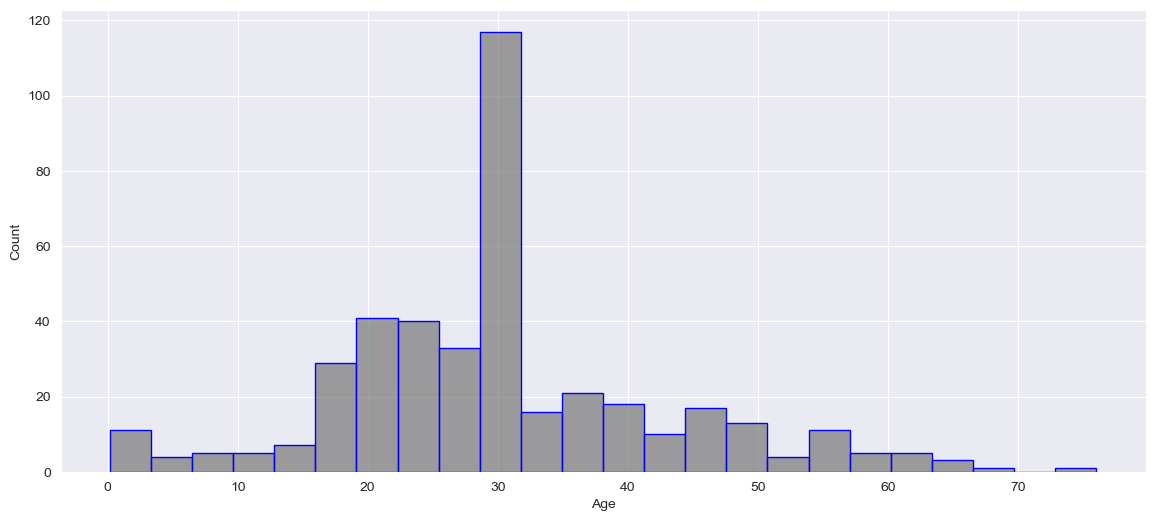

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.histplot(titanic_df['Age'],color = 'grey',edgecolor= 'blue')
plt.show()

# -- what is max/min/av age of pass for each class

In [ ]:
titanic_df.groupby(by='PClass')['Age'].min()

PClass
1    6.00
2    0.92
3    0.17
Name: Age, dtype: float64

In [ ]:
titanic_df.groupby(by='PClass')['Age'].max()

PClass
1    76.0
2    63.0
3    50.0
Name: Age, dtype: float64

In [ ]:
titanic_df.groupby(by='PClass')['Age'].mean()

PClass
1    40.000000
2    28.843226
3    25.841382
Name: Age, dtype: float64

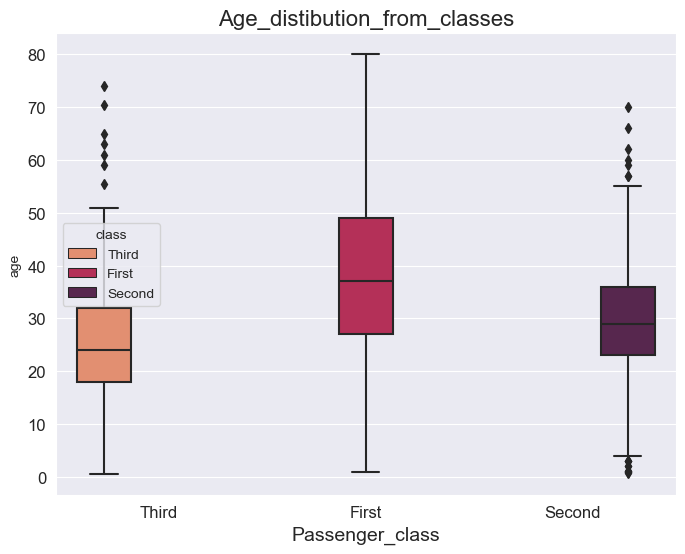

In [391]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(titanic_df,x='class',y='age',hue='class',palette = 'rocket_r')
#style of diagram
sns.set_style("darkgrid")
ax.set_title('Age_distibution_from_classes', loc='center', fontsize='medium',size = 16)
plt.xticks(size=12)
plt.xlabel('Passenger_class', size=14)
plt.yticks(size=12)
plt.show()

# -- how many male/female was on ship

In [ ]:
titanic_df['Sex'].value_counts()

Sex
male      265
female    152
Name: count, dtype: int64

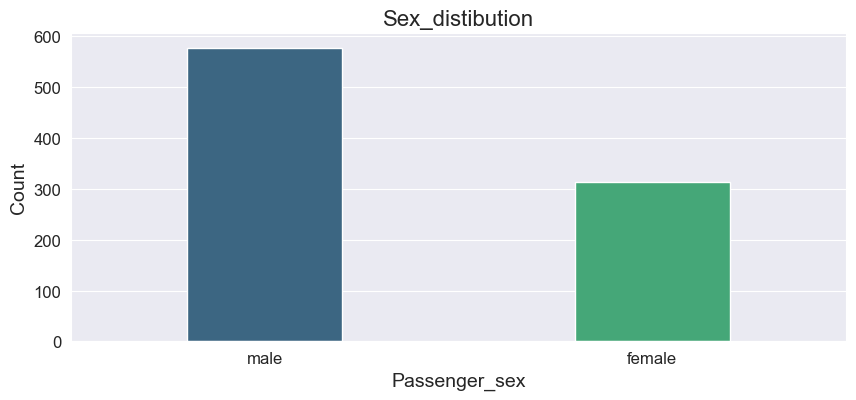

In [392]:
fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.countplot(titanic_df,x='sex',palette = 'viridis',width=0.4)
#style of diagram
sns.set_style("darkgrid")
ax.set_title('Sex_distibution', loc='center', fontsize='medium',size = 16)
plt.xticks(size=12)
plt.xlabel('Passenger_sex', size=14)
plt.ylabel('Count', size=14)
plt.yticks(size=12)
plt.show()

# -- how many male/female of each class was on the ship

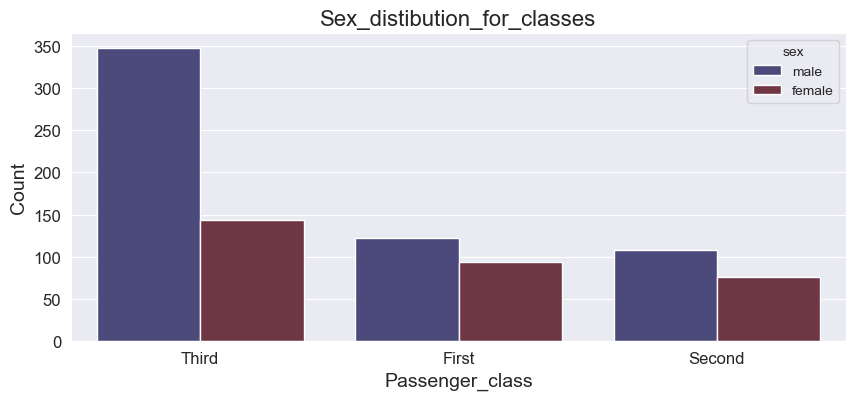

In [393]:
fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.countplot(titanic_df,x='class',hue='sex',palette = 'icefire')
#style of diagram
sns.set_style("darkgrid")
ax.set_title('Sex_distibution_for_classes', loc='center', fontsize='medium',size = 16)
plt.xticks(size=12)
plt.xlabel('Passenger_class', size=14)
plt.ylabel('Count', size=14)
plt.yticks(size=12)
plt.show()

# -- what percent of surv from male / female

In [ ]:
titanic_df['Survived'] = titanic_df['Survived'].astype(int)

In [ ]:
titanic_df['Survived'].unique()

array([0, 1])

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int32  
 2   PClass       417 non-null    object 
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          417 non-null    float64
 6   Fare         417 non-null    float64
 7   Embarked     417 non-null    object 
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 24.6+ KB


In [ ]:
titanic_df.head()

,PassengerId,Survived,PClass,Name,Sex,Age,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,12.2875,S


In [396]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB


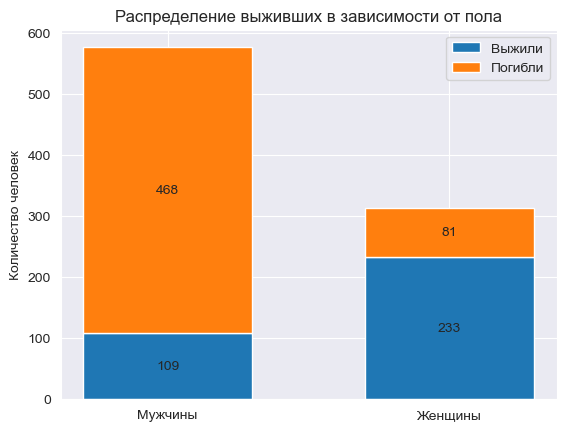

In [398]:
# Посчитаем общее количество мужчин и женщин, а также количество выживших
males_total = len(titanic_df.loc[(titanic_df['sex'] == 'male')])
females_total = len(titanic_df.loc[(titanic_df['sex'] == 'female')])
males_survived = len(titanic_df.loc[((titanic_df['sex'] == 'male') & (titanic_df['survived'] == 1))])
females_survived = len(titanic_df.loc[((titanic_df['sex'] == 'female') & (titanic_df['survived'] == 1))])
males_unsurvived = len(titanic_df.loc[((titanic_df['sex'] == 'male') & (titanic_df['survived'] == 0))])
females_unsurvived = len(titanic_df.loc[((titanic_df['sex'] == 'female') & (titanic_df['survived'] == 0))])



#Визуализируем
survivors_counts = {
    'Выжили': [males_survived, females_survived],
    'Погибли': [males_unsurvived, females_unsurvived]
}

fig, ax = plt.subplots()
bottom = np.zeros(2)

for key, count in survivors_counts.items():
    p = ax.bar(('Мужчины', 'Женщины'), count, width=0.6, label=key, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')

ax.set_title('Распределение выживших в зависимости от пола')
ax.set_ylabel('Количество человек')
ax.legend()
plt.show()

In [403]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB


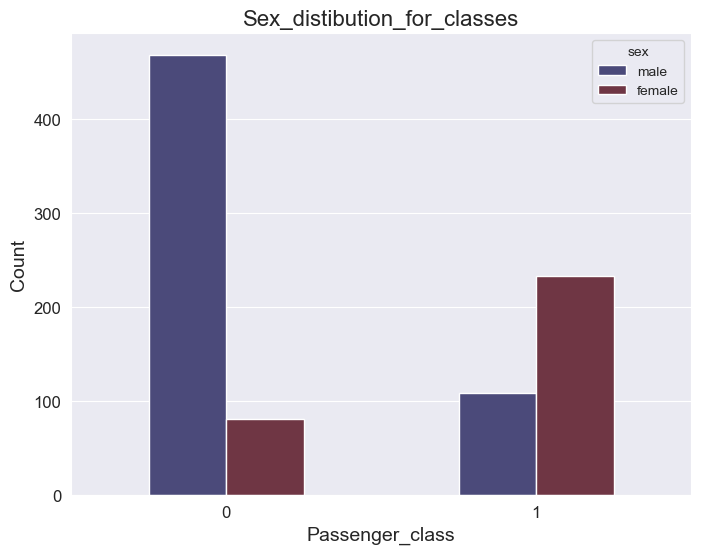

In [401]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(titanic_df,x='survived',hue = 'sex',palette = 'icefire', width=0.5)
#style of diagram
sns.set_style("darkgrid")
ax.set_title('Sex_distibution_for_classes', loc='center', fontsize='medium',size = 16)
plt.xticks(size=12)
plt.xlabel('Passenger_class', size=14)
plt.ylabel('Count', size=14)
plt.yticks(size=12)
plt.show()

# -- what precent of surv from each class

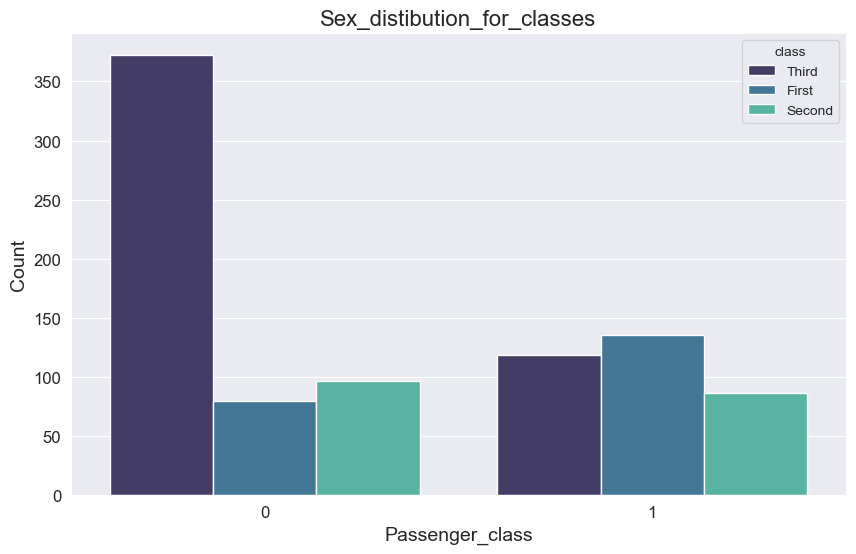

In [415]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(titanic_df,x='survived',hue='class',palette = 'mako')
#style of diagram
sns.set_style("darkgrid")
ax.set_title('Sex_distibution_for_classes', loc='center', fontsize='medium',size = 16)
plt.xticks(size=12)
plt.xlabel('Passenger_class', size=14)
plt.ylabel('Count', size=14)
plt.yticks(size=12)
plt.show()

# -- how many pass of each emb place was on the ship

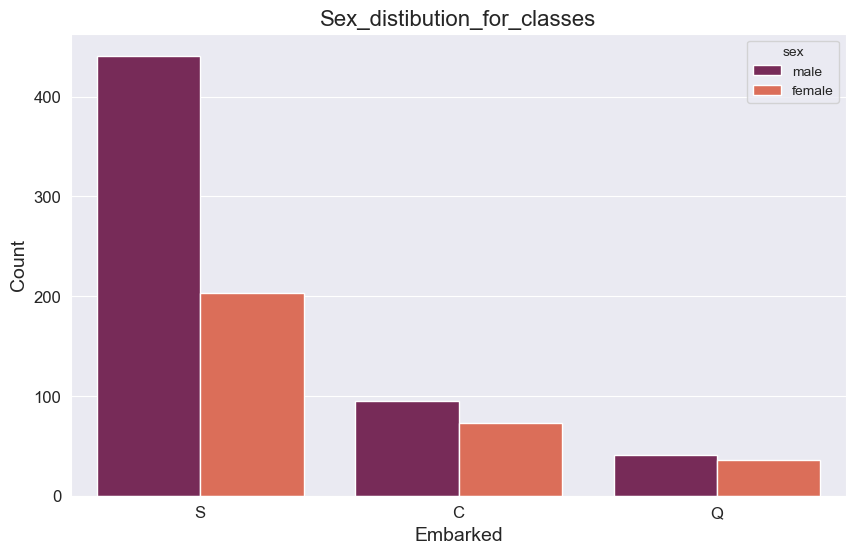

In [416]:
# C : Cherbourg, Q : Queenstown, S : Southampton

fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.countplot(titanic_df,x='embarked',hue='sex',palette = 'rocket')
#style of diagram
sns.set_style("darkgrid")
ax.set_title('Sex_distibution_for_classes', loc='center', fontsize='medium',size = 16)
plt.xticks(size=12)
plt.xlabel('Embarked', size=14)
plt.ylabel('Count', size=14)
plt.yticks(size=12)
plt.show()

In [418]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB
